In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [7]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [8]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

<ipython-input-8-c2348534f728>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
<ipython-input-8-c2348534f728>:2: 

In [9]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,63.0
493,71.0,49.5042,71.0
527,NaN,221.7792,44.0


In [10]:
X_test

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0
...,...,...,...
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,22.0
870,26.0,7.8958,26.0


<ipython-input-11-28c43f84312d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label='Original', hist=False)
<ipython-input-11-28c43f84312d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'], label="Imputed", hist=False)


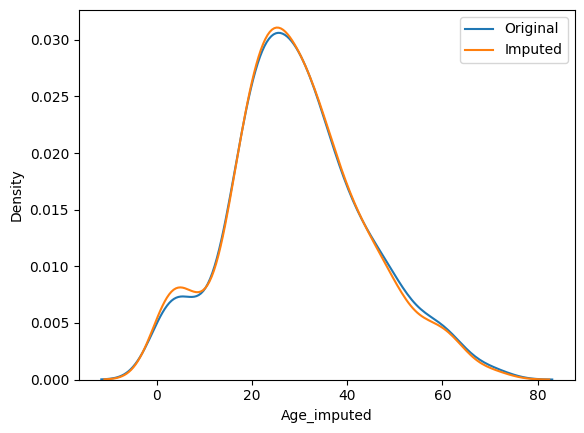

In [11]:
sns.distplot(X_train['Age'], label='Original', hist=False)
sns.distplot(X_train['Age_imputed'], label="Imputed", hist=False)

plt.legend()
plt.show()

In [12]:
print('Orginal Variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Orginal Variable variance:  204.3495133904614
Variance after random imputation:  201.16605731680357


In [13]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,65.446773
Age,71.512440,204.349513,204.349513
Age_imputed,65.446773,204.349513,201.166057


<Axes: >

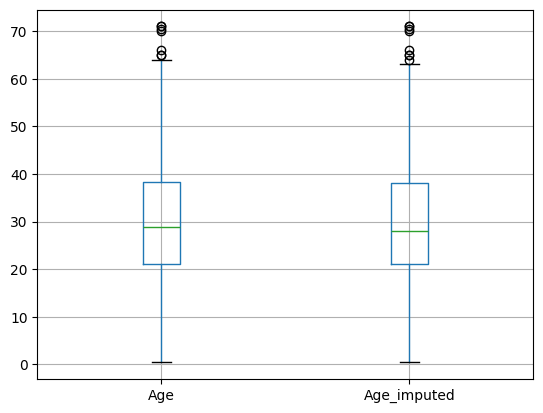

In [14]:
X_train[['Age', 'Age_imputed']].boxplot()

In [15]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(X_train['Fare']))

In [18]:
data = pd.read_csv('house-train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [19]:
data

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [20]:
data.isnull().mean() * 100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [21]:
X = data
y = data['SalePrice']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [24]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']


X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [ ]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1144,NaN,TA,80000,TA,NaN
957,NaN,TA,132000,TA,NaN
44,NaN,TA,141000,TA,NaN
1257,NaN,NaN,99900,NaN,NaN
1109,Gd,TA,280000,TA,Gd


In [25]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

<ipython-input-25-1afaee46fa3c>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
<ipyt

In [26]:
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu_imputed'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu_imputed'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

<ipython-input-26-9e921c2accaa>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu_imputed'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).

In [27]:
temp = pd.concat([
    X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts() / len(X_train)
],
axis=1)

In [28]:
temp.columns=['Original', 'Imputed']
temp

,Original,Imputed
TA,0.951043,0.947774
Fa,0.037171,0.038527
Gd,0.009973,0.011986
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [29]:
temp = pd.concat([
    X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts() / len(df)
],

axis=1)

temp.columns = ['Original ', 'Imputed']
temp

,Original,Imputed
Gd,0.494272,0.639731
TA,0.412439,0.545455
Fa,0.040917,0.056117
Po,0.027823,0.037037
Ex,0.024550,0.032548


<ipython-input-30-46d5e214b30b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist=False, label=category)
<ipython-input-30-46d5e214b30b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu']

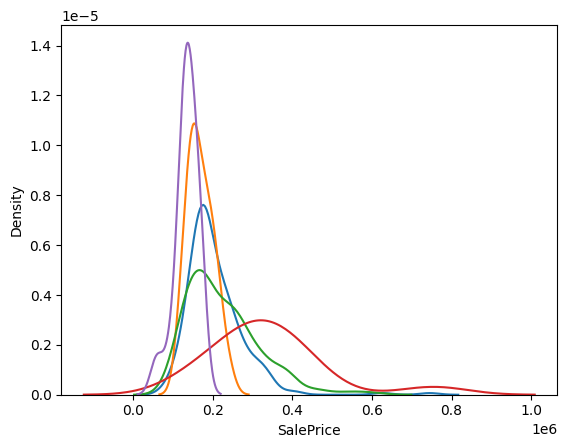

In [30]:
for category in X_train['FireplaceQu'].dropna().unique():
  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist=False, label=category)
plt.show()

<ipython-input-31-c08554c63e7c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], hist=False, label=category)
<ipython-input-31-c08554c63e7c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['Firep

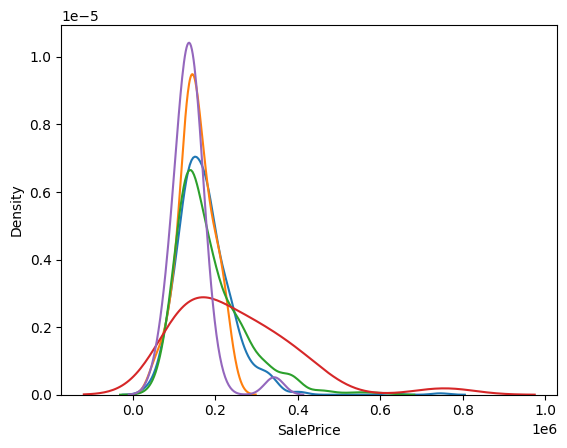

In [31]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], hist=False, label=category)
plt.show()

In [32]:
from sklearn.impute import MissingIndicator, SimpleImputer

In [33]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [36]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [40]:
X_test.head()

,Age,Fare
707,42.0,26.2875
37,21.0,8.0500
615,24.0,65.0000
169,28.0,56.4958
68,17.0,7.9250


In [37]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
X_test_trf

array([[ 42.        ,  26.2875    ],
       [ 21.        ,   8.05      ],
       [ 24.        ,  65.        ],
       [ 28.        ,  56.4958    ],
       [ 17.        ,   7.925     ],
       [ 30.        ,   7.8958    ],
       [ 80.        ,  30.        ],
       [ 25.        ,   7.25      ],
       [ 50.        , 133.65      ],
       [ 25.        ,  26.        ],
       [ 35.        ,  26.        ],
       [ 35.        ,  90.        ],
       [ 55.        ,  16.        ],
       [ 29.78590426,  56.4958    ],
       [ 29.78590426,  56.4958    ],
       [ 19.        ,   7.8542    ],
       [ 29.78590426,  15.2458    ],
       [ 49.        ,   0.        ],
       [ 18.        ,  14.4542    ],
       [ 65.        ,   7.75      ],
       [ 18.        , 108.9       ],
       [ 29.78590426,  22.3583    ],
       [ 16.        ,  18.        ],
       [ 21.        ,   9.825     ],
       [ 19.        ,   6.75      ],
       [  1.        ,  11.1333    ],
       [ 50.        ,  10.5       ],
 

In [41]:
clf = LogisticRegression()
clf.fit(X_train_trf, y_train)

LogisticRegression()

In [42]:
y_pred = clf.predict(X_test_trf)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0])

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6145251396648045

In [44]:
mi = MissingIndicator()
mi.fit(X_train)

MissingIndicator()

In [45]:
X_train_missing = mi.transform(X_train)

In [46]:
X_test_missing = mi.transform(X_train)

In [47]:
X_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [48]:
X_test_missing = mi.transform(X_test)

In [50]:
X_train['Age_NA'] = X_train_missing

In [51]:
X_train['Age_NA']

,Age_NA
30,False
10,False
873,False
182,False
876,False
...,...
534,False
584,True
493,False
527,True


In [52]:
X_test['Age_NA'] = X_test_missing

In [53]:
X_test

,Age,Fare,Age_NA
707,42.0,26.2875,False
37,21.0,8.0500,False
615,24.0,65.0000,False
169,28.0,56.4958,False
68,17.0,7.9250,False
...,...,...,...
89,24.0,8.0500,False
80,22.0,9.0000,False
846,NaN,69.5500,True
870,26.0,7.8958,False


In [54]:
si = SimpleImputer()
X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [55]:
clf2 = LogisticRegression()
clf2.fit(X_train_trf2, y_train)
y_pred2 = clf2.predict(X_test_trf2)
accuracy_score(y_test, y_pred2)

0.6312849162011173

In [56]:
si = SimpleImputer(add_indicator=True)
X_train = si.fit_transform(X_train)
X_test = si.transform(X_test)

In [57]:
clf3 = LogisticRegression()
clf3.fit(X_train_trf2, y_train)
y_pred3 = clf3.predict(X_test_trf2)
accuracy_score(y_test, y_pred3)

0.6312849162011173